## **Importing Libraries**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from filters.KalmanFilter import KalmanFilter
from utils.helper import simulate_ball_throwing, simulate_noisy_observations

import warnings
warnings.filterwarnings('ignore')

## **Define Some Constants**

In [14]:
GRAVITY = 9.81
NOISE_STD = 0.5
INIT_Y = 0
INIT_SPEED = 20
LAUNCH_ANGLE = 45
DT = 0.01

## **Ball Throwing Simulation**

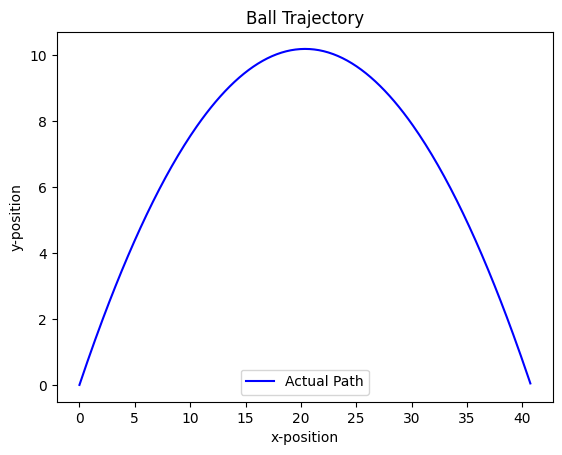

In [15]:
positions = simulate_ball_throwing(init_y=INIT_Y, init_speed=INIT_SPEED, launch_angle=LAUNCH_ANGLE, dt=DT, max_time=100)

plt.plot(positions[:,0], positions[:,1], label='Actual Path', linestyle='-', color='blue')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend(loc='lower center')
plt.title('Ball Trajectory')
plt.show()

## **Noisy Observation Simulation**

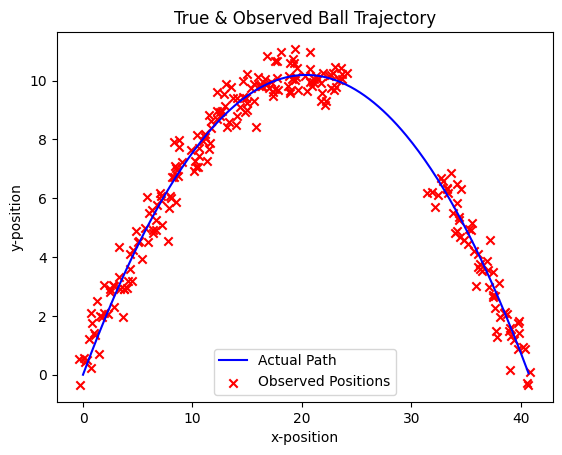

In [16]:
noisy_observations = simulate_noisy_observations(positions, noise_std=NOISE_STD, drop_out_interval=4)

plt.plot(positions[:,0], positions[:,1], label='Actual Path', linestyle='-', color='blue')
plt.scatter(noisy_observations[:,0], noisy_observations[:,1], color='red', label='Observed Positions', marker='x')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend(loc='lower center')
plt.title('True & Observed Ball Trajectory')
plt.show()

## **Apply Kalman Filter**

In [17]:
std_acceleration = 0.01
std_measurement = NOISE_STD

kf = KalmanFilter(DT, std_acceleration, std_measurement)

estimated_positions = []

# Loop over the noisy observations
for i, z in enumerate(noisy_observations):   
    kf.predict()
    kf.update(z.reshape(-1, 1))        
    estimated_positions.append(kf.u[0:2].reshape(-1))

estimated_positions = np.array(estimated_positions)

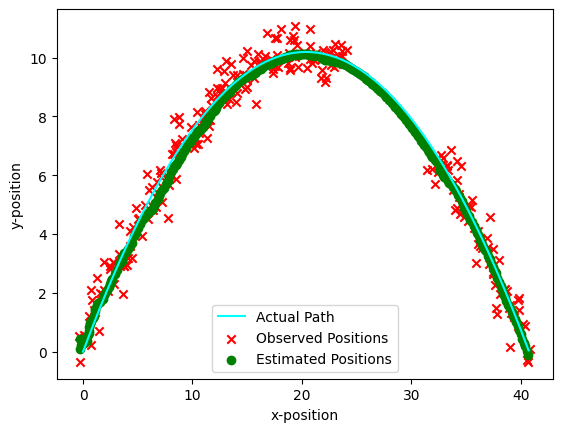

In [18]:
plt.plot(positions[:,0], positions[:,1], color='cyan', label='Actual Path')
plt.scatter(noisy_observations[:,0], noisy_observations[:,1], color='red', label='Observed Positions', marker='x')
plt.scatter(estimated_positions[:,0], estimated_positions[:,1], color='green', label='Estimated Positions')
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend(loc='lower center')
plt.show()